## Clarifying Matrices

In [1]:
# Special thanks to Amir Ebrahimi for clarifying this last workshop!
#
# All quantum gates need to satisfy the property that taking the hermitian
# conjugate and multiply by itself gives the Identity matrix
# This is what we mean by "unitarity"!
#
# U*U_dagger = U_dagger*U = I
# U_dagger = U^-1 

In [2]:
from npquantum import *
from qiskit.visualization import plot_bloch_multivector
# Ignore matplotlib deprecation warnings from qiskit
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
S_dagger

array([[1.000000e+00+0.j, 0.000000e+00+0.j],
       [0.000000e+00+0.j, 6.123234e-17-1.j]])

In [4]:
S

array([[1.000000e+00+0.j, 0.000000e+00+0.j],
       [0.000000e+00+0.j, 6.123234e-17+1.j]])

In [5]:
# Let's remind ourselves what the S gate does in the first place

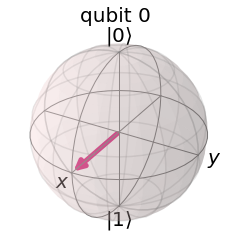

In [6]:
# here's what ketplus looks like
plot_bloch_multivector(to_qiskit_plot(ketplus))
# H * |0> = |+>

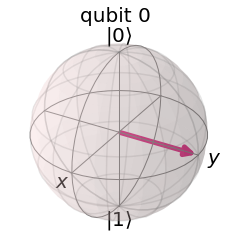

In [7]:
# Apply S
plot_bloch_multivector(to_qiskit_plot(S @ ketplus))

In [8]:
# Let's check that S really is a unitary gate
# If it is the case, then S * S_dagger = I 
# and S_dagger * S = I (matters because order of multiplication can have effects)
# AND S_dagger = S_inverse

In [9]:
np.array_equal((S @ S.conjugate().T), np.eye(2)) # S * S_dagger = I

True

In [10]:
np.array_equal((S.conjugate().T * S), np.eye(2)) # S_dagger * S = I

True

In [11]:
np.array_equal(S.conjugate().T, np.linalg.inv(S)) #S_dagger = S_inverse

True

In [12]:
# NOTE:
# S is not self-reversible, but still reversible
# (If we keep applying S, we'll get back to the same place we started,
# or we could use some Rz's or T (pi/4) rotations, etc.
#
# Some gates ARE self-reversible
# This is where we make the distinction between "hermitian" and "non-hermitian"
# matrices
#
# Hermitian matrices have the following property
# U = U^-1 
# They are their OWN inverses!

In [13]:
# Lets look at one of these hermitian matrices, X
X

array([[0, 1],
       [1, 0]])

In [14]:
# If X is its own inverse, multiplying it by itself should render the Identity
# matrix
np.array_equal(X @X, np.eye(2))

True

In [15]:
# We can visually confirm this is a hermitian operator from the fact that if
# I apply the gate twice, I'll end up back where I started

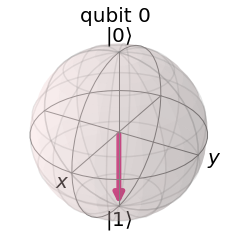

In [16]:
plot_bloch_multivector(to_qiskit_plot(ket1))

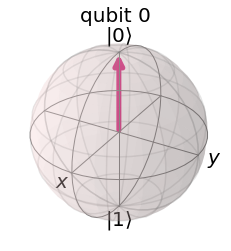

In [17]:
plot_bloch_multivector(to_qiskit_plot(X @ ket1))

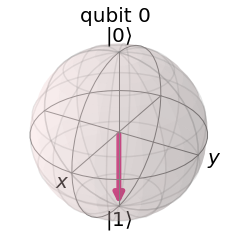

In [18]:
plot_bloch_multivector(to_qiskit_plot(X @ X @ ket1)) # back to where we started!

In [19]:
# Let's see what happens to a non-hermitian matrix
#
# Off the top of my head, T should be a good candidate!
# - It doesn't reverse what it just did upon a second multiplication
# - It *probably* doesn't satisfy T*T = I

In [20]:
np.array_equal(T @ T , np.eye(2))

False

## Multi-Qubit States

In [21]:
# To express the state of multiple qubits, we need to take the kronecker product
# 

In [22]:
ket0

array([[1],
       [0]])

In [23]:
np.kron(ket0, ket0) #|00>

array([[1],
       [0],
       [0],
       [0]])

In [24]:
np.kron(ket0, ket1) #|01>

array([[0],
       [1],
       [0],
       [0]])

In [25]:
# w|00> + x|01> + y|10> + z|11>
# we now have four possible coefficients
## -> still have to satisfy the condition that taking the absolute value and
##    squaring each of them, then adding it all together = 1!

# Can also use the "coefficient per row" method to keep track of things...
#
# given the vertical vector/quantum state ket:
## 0 -> first row, corresponds to coeff. of |00> # 0 
## 0 -> second row, '                     ' |01> # 1
## 0 -> third, '                          ' |10> # 2
## 1 -> fouth, '                          ' |11> # 3
# From the above, we can tell that we are in the |11> state
# 
# - Just increment by one in binary, as you go down!
# 111111 1 = 2^32
# 1024

In [26]:
ket00 ## built-ins for two-qubit states

array([[1],
       [0],
       [0],
       [0]])

In [27]:
# Qiskit allows us to visualize these multiple qubit states

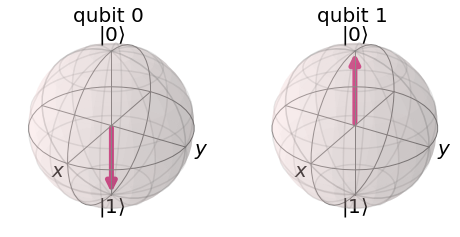

In [28]:
plot_bloch_multivector(to_qiskit_plot(np.kron(ket0, ket1))) #|01>

In [29]:
np.kron(ket0,ket1) #|01>

array([[0],
       [1],
       [0],
       [0]])

In [30]:
# Wait a minute...
# qiskit plot is reversed!
# This is a common Qiskit/QASM property where they choose the MSB to be 
# on the right rather than the left

## CX/CNOT - Controlled Not

In [31]:
# Key to multi-qubit gates
# 
# Use one qubit (control) to control another (target)
# -> Apply an X gate on the target qubit, if the first qubit is |1>

## slightly tricky (but not impossible) to represent CXs as matrices

## If our target qubit is the first one, and the control the second..
## |CT> T = Target, C = Control
## |TC>

In [32]:
CXct @ ket00 # we're still in |0> and |0> repsectively

array([[1],
       [0],
       [0],
       [0]])

In [33]:
CXct @ ket01 # CX|01> = |01>, control is |0> so no X applied to |1>

array([[0],
       [1],
       [0],
       [0]])

In [34]:
CXct @ ket10 #CX|10> = |11>, control is |1> so the |X> is applied

array([[0],
       [0],
       [0],
       [1]])

In [35]:
CXct @ ket11 #CX|11> = |10>, control is |1> so the |X> is applied

array([[0],
       [0],
       [1],
       [0]])

In [36]:
CXct #|CT>

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [37]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [38]:
CXtc #|TC>

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [39]:
# NOTE: Can actually take any single qubit gate and turn it into any arbitrary
# Control gate! You just "insert" the 2x2 matrix into a larger 4x4 matrix 
# "template"
# CH, CT, CS, CS_Dagger

## SWAP

In [40]:
## Allows us to swap the values of qubits (switch coefficients)
## ex: |10> -> |01>, |01> -> |10> 
## BUT |11> and |00> should have no effect

In [41]:
SWAP @ ket10 #becomes 01

array([[0],
       [1],
       [0],
       [0]])

In [42]:
SWAP @ ket01 #becomes 10

array([[0],
       [0],
       [1],
       [0]])

In [43]:
SWAP @ ket11 #should just stay 11

array([[0],
       [0],
       [0],
       [1]])

In [44]:
SWAP

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

## CCX/CCNOT/Toffoli- Controlled Controlled Not

In [45]:
# CCX acts as a CX but with an added "AND" gate
# we now have TWO control qubits and ONE target qubit
# Two qubits must be |1> to apply an X to the other qubit

# CCX |111> = |110>
# CCX |110> = |111>

# CCX |101> = |100>

In [46]:
# Lets generate a three-qubit state
ket111 = np.kron(np.kron(ket1,ket1), ket1) #|111> = #|110>

In [47]:
CCX @ ket111 # use the "row coefficient" trick to determine this is #|110>

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [48]:
ket110 = np.kron(np.kron(ket1,ket1), ket0)

In [49]:
CCX @ ket110 # CCX |110> = |111>

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [50]:
ket101 = np.kron(np.kron(ket1,ket0), ket1)

In [51]:
ket101

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [52]:
CCX @ ket101 #CCX|101> = |101> as expected, because the two control qubits 
# are not = 1

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [53]:
# NOTE! Order of the "kron" doesn't really matter for ket generation
# Order of values DOES 
np.array_equal(np.kron(ket1,                np.kron(ket1, ket0)), 
               np.kron(np.kron(ket1, ket1), ket0))

True

## Single Qubit Gates on Multiple Qubits

In [54]:
# Let's say we only want to apply a Hadamard to one qubit, but we dont'
# want it to affect others. How do we do that?

# What if I want to put n single qubit gates on n-1 qubits?

# Can use the Kronecker product!

In [55]:
## Apply hadamards individually on two qubits
HH = np.kron(H,H)

In [56]:
HH

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [57]:
HH @ ket11 #0.25 + 0.25 + ... = 1

array([[ 0.5],
       [-0.5],
       [-0.5],
       [ 0.5]])

In [58]:
## Apply S on one qubit, T on the other
ST = np.kron(S,T)

In [59]:
ST

array([[ 1.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ],
       [ 0.00000000e+00+0.j        ,  7.07106781e-01+0.70710678j,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ],
       [ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         6.12323400e-17+1.j        ,  0.00000000e+00+0.j        ],
       [ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        , -7.07106781e-01+0.70710678j]])

In [60]:
ST @ ket11

array([[ 0.        +0.j        ],
       [ 0.        +0.j        ],
       [ 0.        +0.j        ],
       [-0.70710678+0.70710678j]])

In [61]:
# What if I just want to apply one gate? We use the Identity matrix!

In [62]:
HI = np.kron(H,np.identity(2)) # I * |psi> = |psi>

In [63]:
HI @ ket11 # does the result make sense? Let's think about it...

array([[ 0.        ],
       [ 0.70710678],
       [ 0.        ],
       [-0.70710678]])

In [64]:
# |00>, |01>, |10>, |11>

In [65]:
# try flipping the order
IH = np.kron(np.identity(2), H)

In [66]:
IH @ ket11

array([[ 0.        ],
       [ 0.        ],
       [ 0.70710678],
       [-0.70710678]])

## Universal Gates

WARNING: The following code USED TO work but it appears some of the circuit decomposition passes have been deprecated as well as the `tk_to_qiskit()` function.
This is currently a work-in-progress to get this demo to work again.

In [67]:
# Mentioned in last workshop that you can approximate other gates with a 
# well chosen "basis set" (often dictated by hardware)

## Some examples:
## Clifford + T = CX, H, S, T
## IBM =          U3, U2, U1, I, CX
## Ion Trapping = Ising (XX, YY, ZZ), Phase (Rx, Ry, Rz)

In [68]:
# Lets see this in action!

In [ ]:
from pytket import Circuit
from pytket.qiskit import tk_to_qiskit

c = Circuit(3) # 3 qubits
c.CCX(0,1,2)   # CCX(control=0,1 target=2)
c.CX(2,1)      # CX(control=2, target=1)
c.SWAP(0,2)    # SWAP(0, 2)

print(tk_to_qiskit(c))

In [ ]:
from pytket.passes import SequencePass, DecomposeMultiQubitsIBM, DecomposeSingleQubitsIBM
from pytket.predicates import CompilationUnit
#Clifford + T
seqpass = SequencePass([DecomposeMultiQubitsIBM(), 
                        DecomposeSingleQubitsIBM()])
cu = CompilationUnit(c)
seqpass.apply(cu)
circ1 = cu.circuit
print(tk_to_qiskit(circ1))